In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [3]:
# count the no of images in train and test folder
def count_images():
    train_path = 'train'
    test_path = 'test1'
    train_count = 0
    test_count = 0
    for root, dirs, files in os.walk(train_path):
        train_count += len(files)
    for root, dirs, files in os.walk(test_path):
        test_count += len(files)
    return train_count, test_count

In [4]:
train_count, test_count = count_images()
print('Train images:', train_count)
print('Test images:', test_count)

Train images: 25000
Test images: 12500


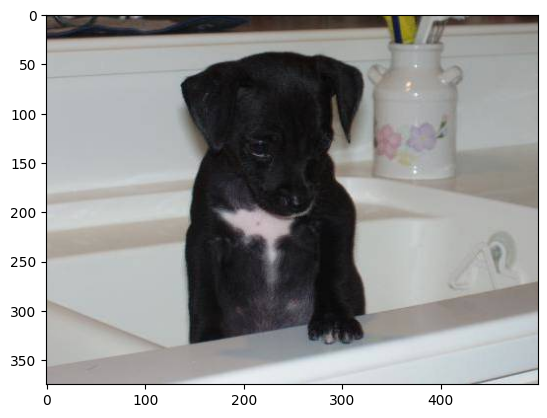

In [5]:
# Display a image of dog
img = mpimg.imread('train/dog.8298.jpg')
imgplot = plt.imshow(img)
plt.show()

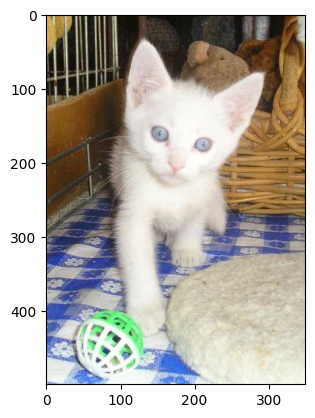

In [6]:
# Display a image of cat
img = mpimg.imread('train/cat.8298.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
# file names in train folder
train_files = os.listdir('train')
print(train_files[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']


In [8]:
# Number of cats and dogs in train folder
train_files = os.listdir('train')
cat_count = 0
dog_count = 0
for file in train_files:
    if 'cat' in file:
        cat_count += 1
    elif 'dog' in file:
        dog_count += 1

print('Cats:', cat_count)
print('Dogs:', dog_count)

Cats: 12500
Dogs: 12500


In [9]:
# Resize 1000 images from cat and 1000 images from dog in train folder and save in rain_resized folder
def resize_images():
    train_files = os.listdir('train')
    cat_count = 0
    dog_count = 0
    for file in train_files:
        if 'cat' in file and cat_count < 1000:
            img = Image.open('train/' + file)
            img = img.resize((224, 224))
            img = img.convert('RGB')
            img.save('train_resized/' + file)
            cat_count += 1
        elif 'dog' in file and dog_count < 1000:
            img = Image.open('train/' + file)
            img = img.resize((224, 224))
            img = img.convert('RGB')
            img.save('train_resized/' + file)
            dog_count += 1

In [10]:
# resize_images()

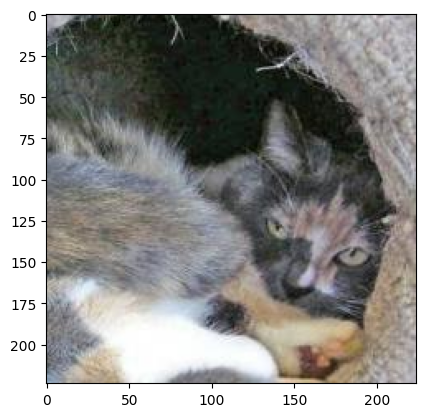

In [11]:
# display the resized image
img = mpimg.imread('train_resized\cat.1003.jpg')
imgplot = plt.imshow(img)
plt.show()

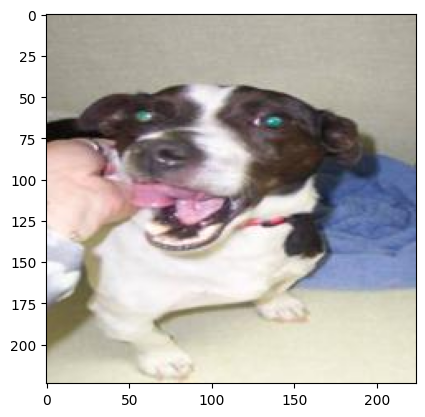

In [12]:
# train_resized\dog.10455.jpg
img = mpimg.imread('train_resized\dog.10455.jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
# number of file in train_resized folder
train_files = os.listdir('train_resized')
print(len(train_files))

2000


In [14]:
# creaing a for loop to assign labels
filenames = os.listdir('train_resized/')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [15]:
# unique labels and value counts
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))


{0: 1000, 1: 1000}


In [16]:
# converting all the resized images to numpy array
images = []
for i in range(2000):
  img = Image.open('train_resized/'+filenames[i])
  img = np.array(img)
  images.append(img)

In [17]:
images

[array([[[205, 163,  87],
         [207, 165,  89],
         [210, 168,  92],
         ...,
         [246, 203, 124],
         [246, 200, 122],
         [246, 200, 122]],
 
        [[205, 163,  87],
         [207, 165,  89],
         [210, 168,  92],
         ...,
         [246, 203, 124],
         [247, 201, 123],
         [246, 200, 122]],
 
        [[205, 163,  87],
         [207, 165,  89],
         [210, 168,  92],
         ...,
         [245, 204, 124],
         [245, 202, 123],
         [245, 202, 123]],
 
        ...,
 
        [[160, 123,  55],
         [160, 123,  55],
         [161, 124,  56],
         ...,
         [  1,   1,   0],
         [  1,   1,   0],
         [  1,   1,   0]],
 
        [[158, 121,  53],
         [159, 122,  54],
         [160, 123,  55],
         ...,
         [  1,   1,   0],
         [  1,   1,   0],
         [  1,   1,   0]],
 
        [[157, 120,  52],
         [157, 120,  52],
         [158, 121,  53],
         ...,
         [  1,   1,   0],
  

In [18]:
# convet images to np.ndarray
images = np.array(images)
type(images)

numpy.ndarray

In [19]:
X = images
Y = np.asarray(labels)

In [20]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [22]:
# unique labels and value counts in y_train and y_test
unique, counts = np.unique(y_train, return_counts=True)
print('y_train:', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('y_test:', dict(zip(unique, counts)))

y_train: {0: 801, 1: 799}
y_test: {0: 199, 1: 201}


In [23]:
# scaling the data
X_train = X_train/255
X_test = X_test/255


In [24]:
import tensorflow as tf
import tensorflow_hub as hub

In [25]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [26]:
# Use Keras 2.
import tf_keras as keras

In [27]:
num_of_classes = 2

model = keras.Sequential([
    
    pretrained_model,
    keras.layers.Dense(num_of_classes)

])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [32]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5



50/50 [==============================] - 60s 593ms/step - loss: 0.2104 - acc: 0.9081
Epoch 2/5
50/50 [==============================] - 26s 524ms/step - loss: 0.0619 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 23s 467ms/step - loss: 0.0466 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 29s 579ms/step - loss: 0.0355 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 28s 552ms/step - loss: 0.0293 - acc: 0.9912


In [33]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 8s 492ms/step - loss: 0.0423 - acc: 0.9875
Test Loss = 0.042311955243349075
Test Accuracy = 0.987500011920929


In [34]:
# Save the model
model.save('dog_cat_classifier.keras')

In [36]:
# input shape
model.input_shape

(None, 224, 224, 3)

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\gokuleshwaran\desktop\35-projects\21. dog vs cat classification dl\.venv\lib\site-packages
Requires: tensorflow-intel
Required-by: tf_keras


In [29]:
!pip show tensorflow_hub

Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\gokuleshwaran\desktop\35-projects\21. dog vs cat classification dl\.venv\lib\site-packages
Requires: numpy, protobuf, tf-keras
Required-by: 


In [30]:
!pip show tf_keras

Name: tf_keras
Version: 2.16.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\gokuleshwaran\desktop\35-projects\21. dog vs cat classification dl\.venv\lib\site-packages
Requires: tensorflow
Required-by: tensorflow-hub
